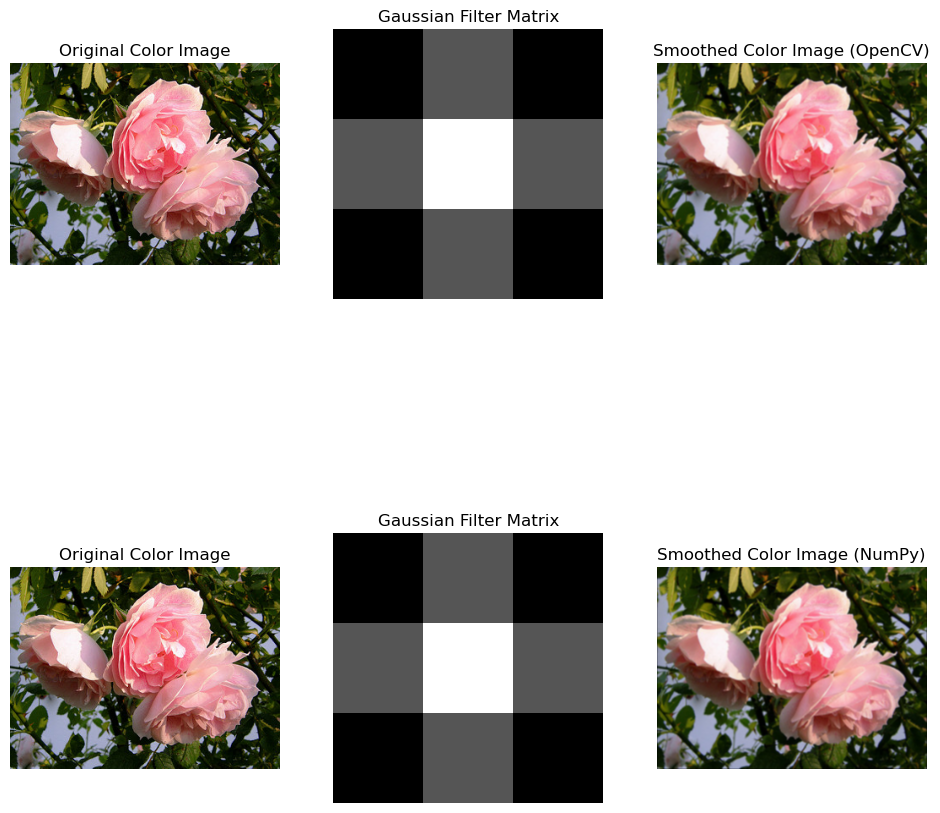

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------- Theoretical Explanation -------------------------
#
# Image smoothing (also known as blurring) is a fundamental operation in image processing 
# used to reduce noise and details in an image. This can be achieved using various types 
# of filters, and one of the most commonly used filters is the **Gaussian filter**.
#
# The **Gaussian filter** is a low-pass filter that smooths an image by averaging pixel 
# values in a neighborhood weighted by a Gaussian function. The filter is often represented 
# as a matrix, and the size of the matrix determines the extent of smoothing.
#
# A typical Gaussian kernel is symmetric and its values decrease as you move away from the 
# center. In this example, we use a 3x3 kernel with values: 
# [1 2 1, 2 4 2, 1 2 1]. The sum of these values is 16, so we normalize the kernel by 
# dividing by 16 to ensure that the sum of the weights is 1.
#
# This kernel is applied to each pixel in the image, and the surrounding pixels are 
# weighted according to the kernel as the filter is convolved over the image.
#
# The convolution operation can be performed in two ways:
# 1. **OpenCV Method**: Using OpenCV’s `cv2.filter2D()` function, which provides an 
#    efficient implementation of convolution for images. This is a high-level function 
#    that performs the convolution operation and is widely used in image processing tasks.
#
# 2. **NumPy Method**: By manually performing the convolution using NumPy arrays. This 
#    approach gives us more flexibility but requires more code and is generally slower 
#    than OpenCV’s optimized methods. In this method, we apply the kernel to each pixel 
#    and calculate the weighted sum of its neighbors.
#
# In this example, we apply the Gaussian filter to a color image. We process each 
# color channel (Red, Green, and Blue) separately and then merge them back into a 
# smoothed color image.
#
# The goal of the code is to compare the results of smoothing the image using both 
# OpenCV’s `filter2D()` function and the manual convolution approach using NumPy.
#
# In the output, we will:
# 1. Show the original color image.
# 2. Display the Gaussian filter matrix.
# 3. Show the smoothed image using OpenCV's `filter2D`.
# 4. Show the smoothed image using NumPy's manual convolution.
#
# ------------------------- End of Theoretical Explanation -------------------------

# Function to display images and the Gaussian Kernel
def display_images(original, gaussian_filter, smoothed_color_opencv, smoothed_color_numpy, title_original, title_gaussian_filter, title_smoothed_opencv, title_smoothed_numpy):
    plt.figure(figsize=(16, 12))

    # First row: Display original image, Gaussian filter, OpenCV smoothed image
    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Original color image
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(gaussian_filter, cmap='gray')  # Display Gaussian filter matrix as an image
    plt.title(title_gaussian_filter)
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(cv2.cvtColor(smoothed_color_opencv, cv2.COLOR_BGR2RGB))  # OpenCV smoothed image
    plt.title(title_smoothed_opencv)
    plt.axis('off')

    # Second row: Display smoothed image using NumPy convolution
    plt.subplot(2, 4, 5)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Original color image again
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(gaussian_filter, cmap='gray')  # Display Gaussian filter matrix again
    plt.title(title_gaussian_filter)
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.imshow(cv2.cvtColor(smoothed_color_numpy, cv2.COLOR_BGR2RGB))  # NumPy smoothed image
    plt.title(title_smoothed_numpy)
    plt.axis('off')

    plt.show()  # Show the images

# Define kernel (Gaussian 3x3 kernel)
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32)

# Normalize the kernel by dividing by 16
gaussian_filter /= 16

# Function to perform convolution using NumPy
def convolve2d(image, kernel):
    """Convolve the image with the kernel using NumPy."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an empty output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output_image[i, j] = np.sum(region * kernel)  # Convolution operation

    return output_image

# ------------ Load the Color Image ------------- #
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

# ------------ Apply Convolution to Color Image ------------ #
# Split the image into R, G, B channels
B, G, R = cv2.split(image)

# Apply convolution to each channel using OpenCV (cv2.filter2D)
smoothed_R_opencv = cv2.filter2D(R, -1, gaussian_filter)
smoothed_G_opencv = cv2.filter2D(G, -1, gaussian_filter)
smoothed_B_opencv = cv2.filter2D(B, -1, gaussian_filter)

# Merge the smoothed channels back together for OpenCV result
smoothed_color_opencv = cv2.merge([smoothed_B_opencv, smoothed_G_opencv, smoothed_R_opencv])

# Apply convolution to each channel using NumPy (manual convolution)
smoothed_R_numpy = convolve2d(R, gaussian_filter)
smoothed_G_numpy = convolve2d(G, gaussian_filter)
smoothed_B_numpy = convolve2d(B, gaussian_filter)

# Merge the smoothed channels back together for NumPy result
smoothed_color_numpy = cv2.merge([smoothed_B_numpy, smoothed_G_numpy, smoothed_R_numpy])

# ------------ Display Results ------------ #
# Display the original color image, Gaussian filter, and results of smoothing
display_images(image, gaussian_filter, smoothed_color_opencv, smoothed_color_numpy,
               'Original Color Image', 'Gaussian Filter Matrix', 'Smoothed Color Image (OpenCV)', 'Smoothed Color Image (NumPy)')
